In [34]:
from pathlib import Path
import numpy as np
from PIL import Image
import pandas as pd
import scanpy
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import scanpy as sc
from sklearn.decomposition import PCA
from umap import UMAP
from tqdm import tqdm
import squidpy as sq
import re

plt.rcParams['figure.figsize'] = [10, 10]

In [48]:
#current_folder = Path(__file__).parent
current_folder = globals()['_dh'][0]
image_dir = current_folder / ".." / ".." / "data" / "raw" / "images"
visium_dir = current_folder / ".." / ".." / "data" / "raw" / "vis"

image_features_out = current_folder / ".." / ".." / "data" / "prc" / "images" / "squdipy_features"
image_features_out.mkdir(parents=True, exist_ok=True)


samples = [f for f in os.listdir(image_dir) if not f.startswith(".")]

In [26]:
sample = samples[0]
adata = sc.read_visium(visium_dir / sample / "outs")
adata.var_names_make_unique()
adata.obsm["spatial"] = adata.obsm["spatial"].astype(int)
adata.obsm["spatial"]

/home/philipp/miniconda3/envs/torch_env2/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


array([[2392, 1718],
       [1976, 4794],
       [4706, 1892],
       ...,
       [2855, 4454],
       [1040, 4033],
       [5236, 3447]])

In [27]:
img = sq.im.ImageContainer(image_dir / sample / (sample + "_pic.tif"))
# img.show()
img

ImageContainer[shape=(6224, 6424), layers=['image']]

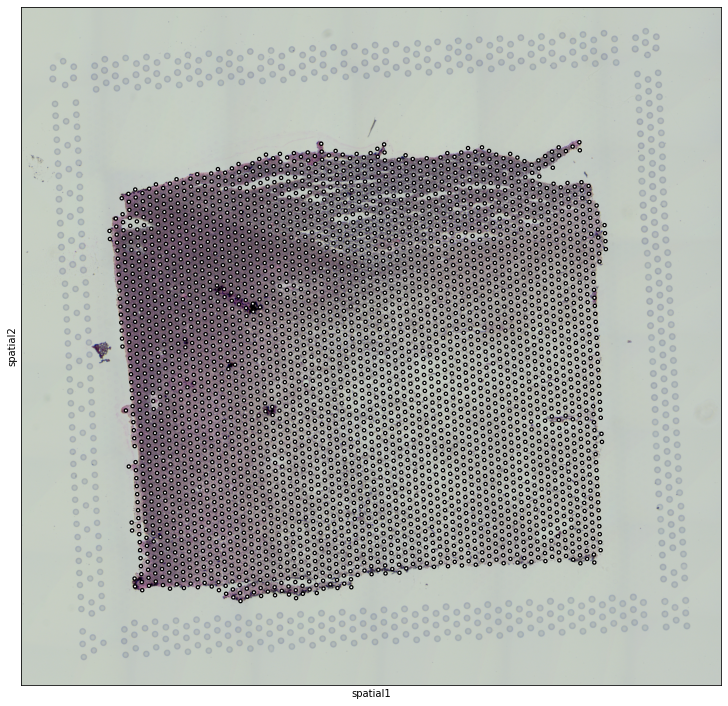

In [38]:
sq.pl.spatial_scatter(adata, outline=True, size=0.3, img=img, alpha=0.01)

In [39]:
for feature in ["texture", "summary", "histogram"]:
    print(feature)
    sq.im.calculate_image_features(adata, img, features=feature, key_added=feature, n_jobs=8, show_progress_bar=True)

  0%|          | 0/3585 [00:00<?, ?/s]

  0%|          | 0/3585 [00:00<?, ?/s]

  0%|          | 0/3585 [00:00<?, ?/s]

In [49]:
adata.write(image_features_out / (sample + ".h5ad"))

In [40]:
# show the calculated features
adata.obsm["texture"].head()

,texture_ch-0_contrast_dist-1_angle-0.00,texture_ch-0_contrast_dist-1_angle-0.79,texture_ch-0_contrast_dist-1_angle-1.57,texture_ch-0_contrast_dist-1_angle-2.36,texture_ch-0_dissimilarity_dist-1_angle-0.00,texture_ch-0_dissimilarity_dist-1_angle-0.79,texture_ch-0_dissimilarity_dist-1_angle-1.57,texture_ch-0_dissimilarity_dist-1_angle-2.36,texture_ch-0_homogeneity_dist-1_angle-0.00,texture_ch-0_homogeneity_dist-1_angle-0.79,...,texture_ch-2_homogeneity_dist-1_angle-1.57,texture_ch-2_homogeneity_dist-1_angle-2.36,texture_ch-2_correlation_dist-1_angle-0.00,texture_ch-2_correlation_dist-1_angle-0.79,texture_ch-2_correlation_dist-1_angle-1.57,texture_ch-2_correlation_dist-1_angle-2.36,texture_ch-2_ASM_dist-1_angle-0.00,texture_ch-2_ASM_dist-1_angle-0.79,texture_ch-2_ASM_dist-1_angle-1.57,texture_ch-2_ASM_dist-1_angle-2.36
AAACAAGTATCTCCCA-1,84.717854,212.680529,117.985199,146.177221,6.326549,9.972590,7.474561,8.405955,0.331169,0.243618,...,0.355551,0.311195,0.985103,0.971392,0.980431,0.975242,0.016831,0.013549,0.015110,0.013585
AAACACCAATAACTGC-1,81.011101,145.903119,82.437095,140.882325,6.934320,9.507089,6.916281,9.318053,0.229320,0.163758,...,0.322999,0.258522,0.847845,0.745722,0.836388,0.758543,0.026969,0.021528,0.025989,0.021294
AAACAGAGCGACTCCT-1,107.055967,175.983459,129.161425,251.270794,7.883904,10.154537,8.537003,11.939036,0.234512,0.179904,...,0.315761,0.263053,0.909336,0.848157,0.883432,0.817424,0.024173,0.019730,0.023313,0.018674
AAACAGCTTTCAGAAG-1,104.152636,213.239130,131.836263,220.862476,7.679926,11.270321,8.798335,11.381380,0.208066,0.137914,...,0.304255,0.240428,0.944470,0.907803,0.941642,0.903062,0.010949,0.008524,0.010554,0.008371
AAACAGGGTCTATATT-1,108.901943,168.949905,127.931082,262.071834,8.169288,10.121928,8.823774,12.826087,0.177824,0.149871,...,0.274567,0.201170,0.932569,0.900456,0.927728,0.867498,0.012158,0.010139,0.011497,0.008840


In [43]:
adata.obsm["summary"].head()

,summary_ch-0_quantile-0.9,summary_ch-0_quantile-0.5,summary_ch-0_quantile-0.1,summary_ch-0_mean,summary_ch-0_std,summary_ch-1_quantile-0.9,summary_ch-1_quantile-0.5,summary_ch-1_quantile-0.1,summary_ch-1_mean,summary_ch-1_std,summary_ch-2_quantile-0.9,summary_ch-2_quantile-0.5,summary_ch-2_quantile-0.1,summary_ch-2_mean,summary_ch-2_std
AAACAAGTATCTCCCA-1,193.0,130.0,93.0,141.451788,40.365191,197.0,114.0,77.0,132.636940,49.210465,191.0,132.0,103.0,141.798099,35.203077
AAACACCAATAACTGC-1,173.0,152.0,123.0,149.526030,18.986292,162.0,134.0,110.4,134.870530,21.204420,156.0,143.0,128.0,141.901313,11.383167
AAACAGAGCGACTCCT-1,182.0,132.0,110.0,137.833861,26.121283,182.0,121.0,95.0,128.469896,31.873521,158.0,132.0,116.0,134.019013,15.637693
AAACAGCTTTCAGAAG-1,200.0,169.0,127.0,165.090991,30.223033,204.0,165.0,116.0,161.928474,34.216131,184.0,165.0,138.0,161.609778,18.095212
AAACAGGGTCTATATT-1,200.0,169.0,132.0,166.613852,25.520774,204.0,165.0,125.8,163.642372,29.425412,182.0,165.0,141.0,161.716614,16.343592


In [42]:
adata.obsm["histogram"].head()

,histogram_ch-0_bin-0,histogram_ch-0_bin-1,histogram_ch-0_bin-2,histogram_ch-0_bin-3,histogram_ch-0_bin-4,histogram_ch-0_bin-5,histogram_ch-0_bin-6,histogram_ch-0_bin-7,histogram_ch-0_bin-8,histogram_ch-0_bin-9,...,histogram_ch-2_bin-0,histogram_ch-2_bin-1,histogram_ch-2_bin-2,histogram_ch-2_bin-3,histogram_ch-2_bin-4,histogram_ch-2_bin-5,histogram_ch-2_bin-6,histogram_ch-2_bin-7,histogram_ch-2_bin-8,histogram_ch-2_bin-9
AAACAAGTATCTCCCA-1,7,55,269,353,345,170,135,82,359,434,...,0,2,164,479,316,311,97,123,402,315
AAACACCAATAACTGC-1,4,3,31,202,296,717,486,395,67,8,...,0,2,32,148,426,1312,259,30,0,0
AAACAGAGCGACTCCT-1,0,3,73,293,586,477,347,168,163,99,...,0,0,3,109,894,678,329,196,0,0
AAACAGCTTTCAGAAG-1,0,0,15,46,64,202,477,576,637,192,...,0,0,0,0,49,117,548,1159,336,0
AAACAGGGTCTATATT-1,4,29,93,140,267,411,527,385,267,86,...,0,9,84,52,227,683,918,234,2,0


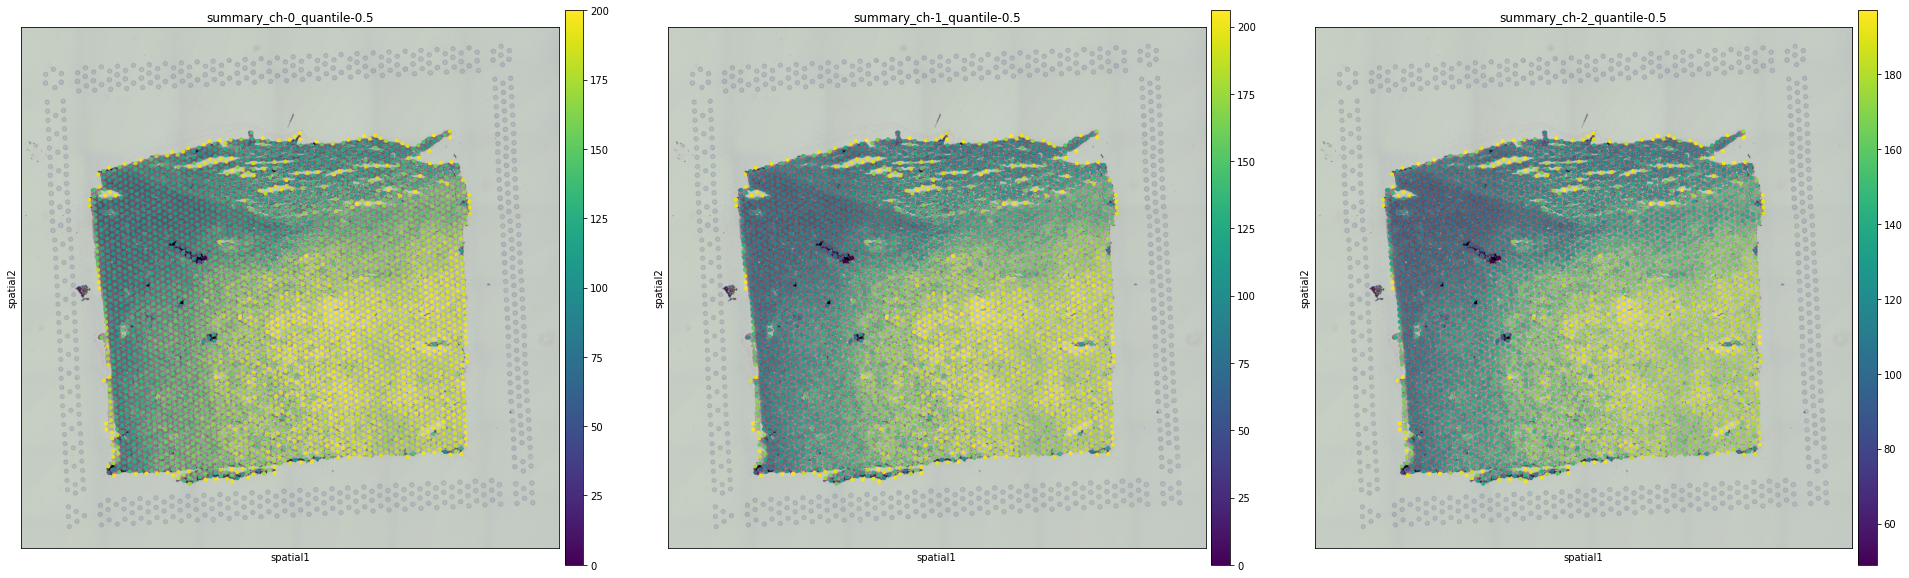

In [46]:
sq.pl.spatial_scatter(
    sq.pl.extract(adata, "summary"),
    color=["summary_ch-0_quantile-0.5", "summary_ch-1_quantile-0.5", "summary_ch-2_quantile-0.5"],
)

,in_tissue,array_row,array_col
AAACAAGTATCTCCCA-1,1,50,102
AAACACCAATAACTGC-1,1,59,19
AAACAGAGCGACTCCT-1,1,14,94
AAACAGCTTTCAGAAG-1,1,43,9
AAACAGGGTCTATATT-1,1,47,13
...,...,...,...
TTGTTTCACATCCAGG-1,1,58,42
TTGTTTCATTAGTCTA-1,1,60,30
TTGTTTCCATACAACT-1,1,45,27
TTGTTTGTATTACACG-1,1,73,41
